# **01. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**02. Upload Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bike.csv to bike.csv


In [ ]:
bike = pd.read_csv('bike.csv')

In [ ]:
bike

,season,year,month,day,hr,is_holiday,is_workingday,weather_condition,temp,humidity,windspeed,count
0,Spring,2011,January,1,0,No,No,Clear,9.84,81.0,0.0000,16
1,Spring,2011,January,1,1,No,No,Clear,9.02,80.0,0.0000,40
2,Spring,2011,January,1,2,No,No,Clear,9.02,80.0,0.0000,32
3,Spring,2011,January,1,3,No,No,Clear,9.84,75.0,0.0000,13
4,Spring,2011,January,1,4,No,No,Clear,9.84,75.0,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,Spring,2012,December,31,19,No,Yes,Cloudy,10.66,60.0,11.0014,119
17375,Spring,2012,December,31,20,No,Yes,Cloudy,10.66,60.0,11.0014,89
17376,Spring,2012,December,31,21,No,Yes,Clear,10.66,60.0,11.0014,90
17377,Spring,2012,December,31,22,No,Yes,Clear,10.66,56.0,8.9981,61


In [ ]:
bike.head()

,season,year,month,day,hr,is_holiday,is_workingday,weather_condition,temp,humidity,windspeed,count
0,Spring,2011,January,1,0,No,No,Clear,9.84,81.0,0.0,16
1,Spring,2011,January,1,1,No,No,Clear,9.02,80.0,0.0,40
2,Spring,2011,January,1,2,No,No,Clear,9.02,80.0,0.0,32
3,Spring,2011,January,1,3,No,No,Clear,9.84,75.0,0.0,13
4,Spring,2011,January,1,4,No,No,Clear,9.84,75.0,0.0,1


#**03. Pre-Processing**

### Casting


In [ ]:
bike.columns

Index(['season', 'year', 'month', 'day', 'hr', 'is_holiday', 'is_workingday',
       'weather_condition', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [ ]:
bike['season'] = bike['season'].astype('category')
bike['month'] = bike['month'].astype('category')
bike['is_holiday'] = bike['is_holiday'].astype('category')
bike['is_workingday'] = bike['is_workingday'].astype('category')
bike['weather_condition'] = bike['weather_condition'].astype('category')

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             17379 non-null  category
 1   year               17379 non-null  int64   
 2   month              17379 non-null  category
 3   day                17379 non-null  int64   
 4   hr                 17379 non-null  int64   
 5   is_holiday         17379 non-null  category
 6   is_workingday      17379 non-null  category
 7   weather_condition  17379 non-null  category
 8   temp               17379 non-null  float64 
 9   humidity           17379 non-null  float64 
 10  windspeed          17379 non-null  float64 
 11  count              17379 non-null  int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 1.0 MB


### Missing Data

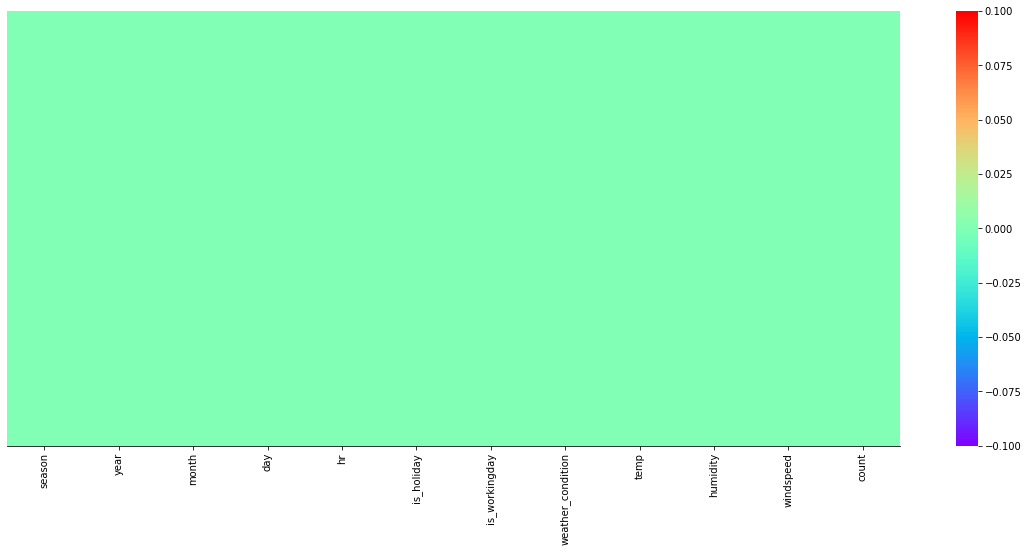

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))                                                   # create figure with size (20,8)

sns.heatmap(bike.isnull(),yticklabels=False, cmap='rainbow')                             # create plot 
sns.despine(top=True, right=True, left=True, bottom=False)                              # remove border
                                     

plt.show()

We dont have any missing values in dataset 

### Duplicate Data

In [ ]:
bike.duplicated().sum()

0

We dont have any duplicate values in dataset 

### Summary Statistics

In [ ]:
bike.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,17379.0,2011.502561,0.500008,2011.00,2011.0000,2012.000,2012.0000,2012.0000
day,17379.0,15.683411,8.789373,1.00,8.0000,16.000,23.0000,31.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.000,18.0000,23.0000
temp,17379.0,20.376474,7.894801,0.82,13.9400,20.500,27.0600,41.0000
humidity,17379.0,62.722884,19.292983,0.00,48.0000,63.000,78.0000,100.0000
windspeed,17379.0,12.736540,8.196795,0.00,7.0015,12.998,16.9979,56.9969
count,17379.0,189.463088,181.387599,1.00,40.0000,142.000,281.0000,977.0000


## Encoding Categorical Features

It is used to transform non-numerical labels into numerical labels (or nominal categorical variables). Numerical labels are always between 1 and the number of classes.

The labels chosen for the categories have no relationship. So categories that have some ties or are close to each other lose such information after encoding. The first unique value in your column becomes 1, the second becomes 2, the third becomes 3, and so on.

ordinal encoding for categorical variables that have a natural rank ordering

In this cases categorical values we choose to change ordinal encoder :
* year
* month
* day
* hr

In [ ]:
bike['year'] = bike['year'].map({2011:0 , 2012 :1})
bike['month'] = bike['month'].map({'January' :1 ,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})

In [ ]:
bike_ordinal = bike[['year','month','day','hr']]
bike_ordinal 

,year,month,day,hr
0,0,1,1,0
1,0,1,1,1
2,0,1,1,2
3,0,1,1,3
4,0,1,1,4
...,...,...,...,...
17374,1,12,31,19
17375,1,12,31,20
17376,1,12,31,21
17377,1,12,31,22


In [ ]:
bike_ordinal.reset_index(drop=True,inplace=True)

#### One Hot Encoding

Here, we map each category to a vector that contains 1 and 0 denoting the presence of the feature or not. The number of vectors depends on the categories which we have in our dataset. For high cardinality features, this method produces a lot of columns

Use one-hot encoding for categorical variables that do not have a natural rank ordering :

* season
* is_holiday
* is_working
* weather_condition

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
bike_ohe = bike[['season','is_holiday', 'is_workingday',
       'weather_condition']]
bike_ohe = ohe.fit_transform(bike_ohe).toarray().astype('int64')
bike_ohe = pd.DataFrame(bike_ohe,columns=(pd.get_dummies(bike[['season','is_holiday', 'is_workingday',
       'weather_condition']]).columns))
bike_ohe

,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
0,0,1,0,0,1,0,1,0,1,0,0,0
1,0,1,0,0,1,0,1,0,1,0,0,0
2,0,1,0,0,1,0,1,0,1,0,0,0
3,0,1,0,0,1,0,1,0,1,0,0,0
4,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,1,0,0,1,0,0,1,0,1,0,0
17375,0,1,0,0,1,0,0,1,0,1,0,0
17376,0,1,0,0,1,0,0,1,1,0,0,0
17377,0,1,0,0,1,0,0,1,1,0,0,0


In [ ]:
bike_ohe.reset_index(drop=True,inplace=True)

## Numerical features

In [ ]:
bike_num = bike[['temp','humidity','windspeed','count']]
bike_num

,temp,humidity,windspeed,count
0,9.84,81.0,0.0000,16
1,9.02,80.0,0.0000,40
2,9.02,80.0,0.0000,32
3,9.84,75.0,0.0000,13
4,9.84,75.0,0.0000,1
...,...,...,...,...
17374,10.66,60.0,11.0014,119
17375,10.66,60.0,11.0014,89
17376,10.66,60.0,11.0014,90
17377,10.66,56.0,8.9981,61


## Final Dataset

In [ ]:
dataset = pd.concat([bike_num,bike_ordinal,bike_ohe],axis=1)
dataset

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
0,9.84,81.0,0.0000,16,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0
1,9.02,80.0,0.0000,40,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0
2,9.02,80.0,0.0000,32,0,1,1,2,0,1,0,0,1,0,1,0,1,0,0,0
3,9.84,75.0,0.0000,13,0,1,1,3,0,1,0,0,1,0,1,0,1,0,0,0
4,9.84,75.0,0.0000,1,0,1,1,4,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,10.66,60.0,11.0014,119,1,12,31,19,0,1,0,0,1,0,0,1,0,1,0,0
17375,10.66,60.0,11.0014,89,1,12,31,20,0,1,0,0,1,0,0,1,0,1,0,0
17376,10.66,60.0,11.0014,90,1,12,31,21,0,1,0,0,1,0,0,1,1,0,0,0
17377,10.66,56.0,8.9981,61,1,12,31,22,0,1,0,0,1,0,0,1,1,0,0,0


In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,17379.0,20.376474,7.894801,0.82,13.9400,20.500,27.0600,41.0000
humidity,17379.0,62.722884,19.292983,0.00,48.0000,63.000,78.0000,100.0000
windspeed,17379.0,12.736540,8.196795,0.00,7.0015,12.998,16.9979,56.9969
count,17379.0,189.463088,181.387599,1.00,40.0000,142.000,281.0000,977.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.000,1.0000,1.0000
day,17379.0,15.683411,8.789373,1.00,8.0000,16.000,23.0000,31.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.000,18.0000,23.0000
season_Fall,17379.0,0.258703,0.437935,0.00,0.0000,0.000,1.0000,1.0000
season_Spring,17379.0,0.244088,0.429557,0.00,0.0000,0.000,0.0000,1.0000
season_Summer,17379.0,0.253697,0.435139,0.00,0.0000,0.000,1.0000,1.0000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   temp                          17379 non-null  float64 
 1   humidity                      17379 non-null  float64 
 2   windspeed                     17379 non-null  float64 
 3   count                         17379 non-null  int64   
 4   year                          17379 non-null  int64   
 5   month                         17379 non-null  category
 6   day                           17379 non-null  int64   
 7   hr                            17379 non-null  int64   
 8   season_Fall                   17379 non-null  int64   
 9   season_Spring                 17379 non-null  int64   
 10  season_Summer                 17379 non-null  int64   
 11  season_Winter                 17379 non-null  int64   
 12  is_holiday_No                 17379 non-null  

In [ ]:
corelation = dataset.corr()

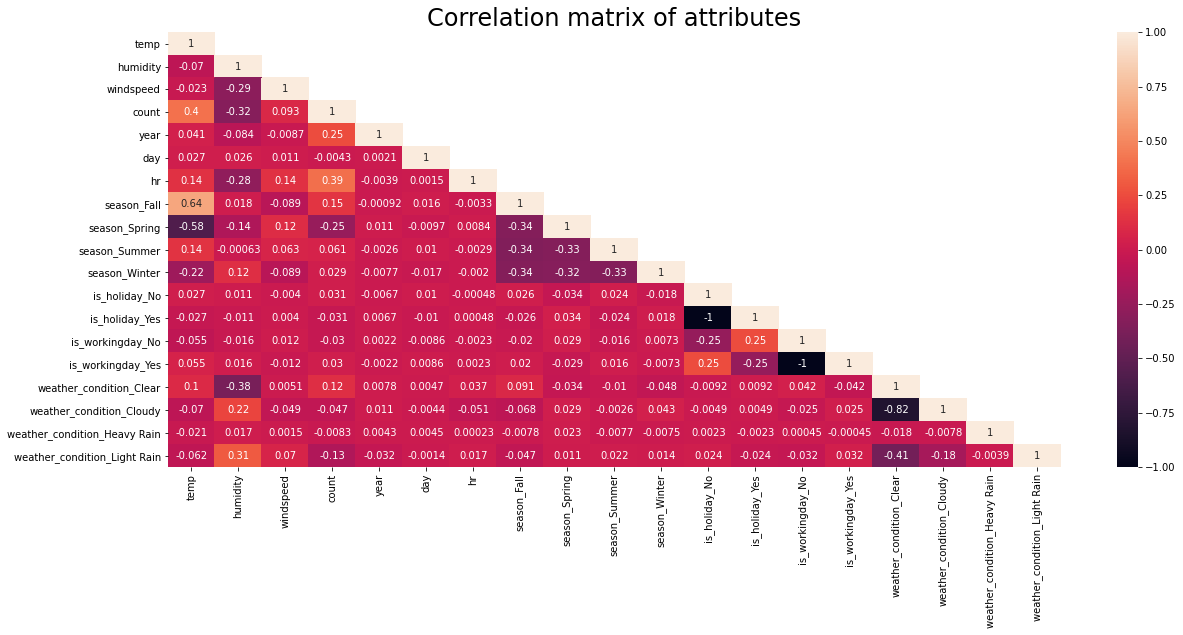

In [ ]:
correMtr=corelation
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(correMtr,mask=mask,annot=True)
ax.set_title('Correlation matrix of attributes', size=24, y=1.12)
plt.show()

In [ ]:
dataset.to_csv(r'bike_preprocessing.csv', index = False, header=True)

#**04. Spliting Data Modeling and Testing**

We separate the data for the last 1 month from the dataset in order to compare our modeling prediction output with the actual. We save this dataset as bike_model1

In [ ]:
bike_model1 = dataset[:-(31*24)+2]
bike_model1

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
0,9.84,81.0,0.0000,16,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0
1,9.02,80.0,0.0000,40,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0
2,9.02,80.0,0.0000,32,0,1,1,2,0,1,0,0,1,0,1,0,1,0,0,0
3,9.84,75.0,0.0000,13,0,1,1,3,0,1,0,0,1,0,1,0,1,0,0,0
4,9.84,75.0,0.0000,1,0,1,1,4,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,13.12,66.0,0.0000,377,1,11,30,19,0,0,0,1,1,0,0,1,1,0,0,0
16633,13.12,66.0,0.0000,245,1,11,30,20,0,0,0,1,1,0,0,1,1,0,0,0
16634,12.30,75.0,6.0032,183,1,11,30,21,0,0,0,1,1,0,0,1,1,0,0,0
16635,12.30,75.0,0.0000,163,1,11,30,22,0,0,0,1,1,0,0,1,1,0,0,0


In [ ]:
bike_model1.to_csv(r'bike_model1.csv', index = False, header=True)

In [ ]:
bike_testing1 = dataset.tail((31*24)-2)
bike_testing1 

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
16637,10.66,81.0,0.0000,108,1,12,1,0,0,0,0,1,1,0,1,0,1,0,0,0
16638,10.66,81.0,0.0000,69,1,12,1,1,0,0,0,1,1,0,1,0,1,0,0,0
16639,10.66,81.0,0.0000,50,1,12,1,2,0,0,0,1,1,0,1,0,0,1,0,0
16640,10.66,81.0,8.9981,15,1,12,1,3,0,0,0,1,1,0,1,0,0,1,0,0
16641,10.66,81.0,6.0032,5,1,12,1,4,0,0,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,10.66,60.0,11.0014,119,1,12,31,19,0,1,0,0,1,0,0,1,0,1,0,0
17375,10.66,60.0,11.0014,89,1,12,31,20,0,1,0,0,1,0,0,1,0,1,0,0
17376,10.66,60.0,11.0014,90,1,12,31,21,0,1,0,0,1,0,0,1,1,0,0,0
17377,10.66,56.0,8.9981,61,1,12,31,22,0,1,0,0,1,0,0,1,1,0,0,0


In [ ]:
bike_testing1.to_csv(r'bike_testing1.csv', index = False, header=True)

We separate the data for 70:30 ratio from the dataset in order to compare our modeling prediction output with the actual. We save this dataset as bike_model2

In [ ]:
bike_model2 = dataset.head(12166)
bike_model2

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
0,9.84,81.0,0.0000,16,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0
1,9.02,80.0,0.0000,40,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0
2,9.02,80.0,0.0000,32,0,1,1,2,0,1,0,0,1,0,1,0,1,0,0,0
3,9.84,75.0,0.0000,13,0,1,1,3,0,1,0,0,1,0,1,0,1,0,0,0
4,9.84,75.0,0.0000,1,0,1,1,4,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12161,28.70,74.0,16.9979,204,1,5,26,22,0,0,1,0,1,0,1,0,1,0,0,0
12162,28.70,74.0,16.9979,150,1,5,26,23,0,0,1,0,1,0,1,0,1,0,0,0
12163,27.88,69.0,11.0014,137,1,5,27,0,0,0,1,0,1,0,1,0,0,1,0,0
12164,27.06,74.0,15.0013,78,1,5,27,1,0,0,1,0,1,0,1,0,1,0,0,0


In [ ]:
bike_model2.to_csv(r'bike_model2.csv', index = False, header=True)

In [ ]:
bike_testing2 = dataset.tail(5213)
bike_testing2

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
12166,26.24,73.0,11.0014,36,1,5,27,3,0,0,1,0,1,0,1,0,1,0,0,0
12167,25.42,83.0,12.9980,11,1,5,27,4,0,0,1,0,1,0,1,0,1,0,0,0
12168,25.42,83.0,12.9980,7,1,5,27,5,0,0,1,0,1,0,1,0,1,0,0,0
12169,25.42,83.0,11.0014,22,1,5,27,6,0,0,1,0,1,0,1,0,1,0,0,0
12170,25.42,88.0,11.0014,52,1,5,27,7,0,0,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,10.66,60.0,11.0014,119,1,12,31,19,0,1,0,0,1,0,0,1,0,1,0,0
17375,10.66,60.0,11.0014,89,1,12,31,20,0,1,0,0,1,0,0,1,0,1,0,0
17376,10.66,60.0,11.0014,90,1,12,31,21,0,1,0,0,1,0,0,1,1,0,0,0
17377,10.66,56.0,8.9981,61,1,12,31,22,0,1,0,0,1,0,0,1,1,0,0,0


In [ ]:
bike_testing2.to_csv(r'bike_testing2.csv', index = False, header=True)